# Tensorflow tutorial - Introduction to Tensorflow 2 with MNIST
---

## Intro

This is a guided exercise to learn how to work with Tensorflow using one of the most common datasets available for learning.

The MNIST dataset includes labeled images of handwritten numbers. The user is meant to clasify these images into their integer value using a machine learning model. In our case, we're using the high-level Keras API included with Tensorflow.

Documentation info about MNIST:

> This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage.

Let's begin.

---

We start by importing the tensorflow library

In [18]:
import tensorrt #Hardware requirement
import tensorflow as tf
import numpy as np
import pandas as pd 
import plotly.express as px
print("Tensorflow version: ", tf.__version__) #Version check

import matplotlib.pyplot as plt
%matplotlib inline

Tensorflow version:  2.12.0


In [19]:
#This is a hardware requirement to limit memory size

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


Next, we can use a built-in function to import the MNIST dataset. Tensorflow already comes packages with it so we just have to import it.

In [20]:
mnist = tf.keras.datasets.mnist #We import the dataset into a 'mnist' variable

(x_train, y_train), (x_test, y_test) = mnist.load_data() #This function returns two tuples, the first one with image data, and the second one with data for validation
x_train, x_test = x_train / 255.0, x_test / 255.0 #We normalize the value of the image data

## Building the model

After we have imported the dataset and necesary dependencies, we can begin building our machine learning model. Make sure to keep up with the theoretical understanding of how a machine learning model works to get a better idea of what this code is doing.

---

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

From the Tensorflow website:

> Sequential is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

 >For each example, the model returns a vector of logits or log-odds scores, one for each class.

 Write about how each of these layers works:

In [22]:
predictions = model(x_train[:1]).numpy() # type: ignore
predictions

array([[-0.2730735 ,  0.3276099 ,  0.16598701,  0.0961852 , -0.5543958 ,
        -0.2509409 ,  0.69298446,  0.11433764, -0.02493188, -0.46115425]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to probabilities for each class:

In [23]:
tf.nn.softmax(predictions).numpy() # type: ignore

array([[0.07241467, 0.13203831, 0.11233318, 0.10475953, 0.0546575 ,
        0.07403525, 0.1902743 , 0.10667852, 0.09280962, 0.05999901]],
      dtype=float32)

Now, we define a loss function for training using `losses.SparseCategoricalCrossentropy(from_logits=True)`

In [24]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [25]:
loss_fn(y_train[:1], predictions).numpy()

2.6032138

Before beginning training, we must compile our model. We set the optimizer to adam, set the loss to our previously defined function and then we specify a metric for evaluation. In our case we will be evaluating for accuracy.

In [26]:
model.compile(optimizer='adam',
              loss = loss_fn,
              metrics = ['accuracy'])

## Training the model and evaluation

Using the `Model.fit()` method, we train the model with the goal to minimize that loss.

---

In [27]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2945 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1445 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1100 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0886 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0743 - accuracy: 0.9766


The `Model.evaluate` method checks the model's performance, usually on a validation set or test set.

In [28]:
model.evaluate(x_test, y_test, verbose = 2) # type: ignore

313/313 - 0s - loss: 0.0755 - accuracy: 0.9759 - 286ms/epoch - 914us/step


[0.07547806203365326, 0.9758999943733215]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the TensorFlow tutorials.

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [29]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[9.0630099e-09, 1.0820114e-09, 6.9567818e-07, 1.3824030e-04,
        9.3638760e-12, 1.0973007e-07, 7.6712301e-15, 9.9986017e-01,
        1.8015193e-07, 5.0086652e-07],
       [3.8586309e-10, 1.8331593e-05, 9.9992990e-01, 5.0920993e-05,
        2.2460051e-15, 5.8620378e-07, 3.8563572e-10, 9.2778530e-13,
        2.2753412e-07, 5.0120451e-14],
       [2.3772651e-05, 9.9872452e-01, 1.1619275e-04, 2.4264549e-04,
        7.7923585e-05, 2.9061601e-05, 1.4434988e-04, 3.7162326e-04,
        2.6401842e-04, 5.9428162e-06],
       [9.9908197e-01, 5.6501740e-08, 5.8340875e-04, 9.8873452e-06,
        1.1360767e-07, 4.3352447e-05, 2.5459340e-06, 2.5151769e-04,
        2.8649529e-08, 2.7119697e-05],
       [7.1661075e-06, 3.9134762e-10, 3.1441217e-05, 4.5219505e-07,
        9.7070003e-01, 1.1331080e-06, 1.3997881e-05, 1.3254666e-04,
        1.3864822e-05, 2.9099401e-02]], dtype=float32)>

## Conclusion

The model has been succesfully trained with Keras as well as evaluated. Try modifying the code to be able to visualize a specific case.

---

## Extra

Data visualization workflow. We'll try to make the problem presentable for someone unfamiliar with machine learning.

---

First, what we want to do is plot the MNIST dataset with its given labels, this way the reader will know what the pictures *actually* look like, and how the dataset classifies them.

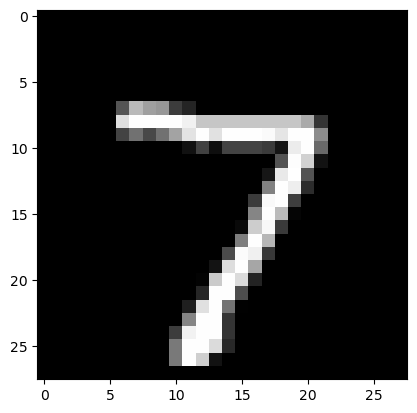

In [30]:
# pick a sample to plot
sample = 0
image = x_test[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

Good! now that we know how to poke the dataset, let's plot a few elements.

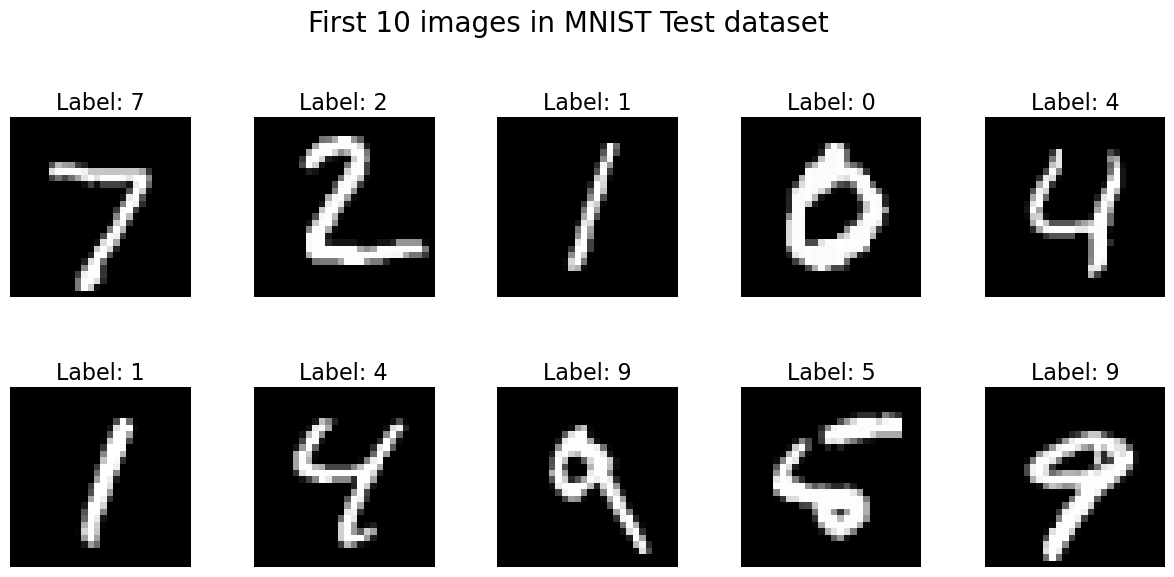

In [31]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('First 10 images in MNIST Test dataset', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3, top=0.8, bottom=0.05)

for i in range(10):
    axs[i//5, i%5].imshow(x_test[i], cmap='gray')
    axs[i//5, i%5].set_title(f"Label: {y_test[i]}", fontsize=16)
    axs[i//5, i%5].axis('off')
    
plt.show()

Now that we have an idea of what the **testing** dataset looks like, how about we take a single element from it and see how the model predicts it. To do this we just need to recall our `probability_model`:

In [32]:
predictions = probability_model(x_test[:10])
print(predictions)

tf.Tensor(
[[9.06300990e-09 1.08200937e-09 6.95678864e-07 1.38240299e-04
  9.36389421e-12 1.09730067e-07 7.67123012e-15 9.99860168e-01
  1.80151929e-07 5.00866065e-07]
 [3.85863091e-10 1.83315933e-05 9.99929905e-01 5.09209931e-05
  2.24599659e-15 5.86203782e-07 3.85635718e-10 9.27781723e-13
  2.27534116e-07 5.01204506e-14]
 [2.37726508e-05 9.98724520e-01 1.16192648e-04 2.42645256e-04
  7.79235852e-05 2.90615444e-05 1.44349731e-04 3.71622533e-04
  2.64018163e-04 5.94281619e-06]
 [9.99081969e-01 5.65017402e-08 5.83408750e-04 9.88734519e-06
  1.13607562e-07 4.33524474e-05 2.54593397e-06 2.51517689e-04
  2.86495823e-08 2.71196968e-05]
 [7.16611385e-06 3.91348287e-10 3.14412391e-05 4.52195877e-07
  9.70699906e-01 1.13310887e-06 1.39978920e-05 1.32546891e-04
  1.38648347e-05 2.90994681e-02]
 [1.26509531e-06 9.99720752e-01 3.35665391e-07 2.97466158e-05
  8.74501347e-06 1.46079117e-07 1.14177442e-06 2.23321462e-04
  1.37291208e-05 8.05035825e-07]
 [1.04142905e-09 1.32203060e-09 1.38904115e-08 

That's a probability distribution!! That's too much math!! Let's see if we can do something about it

>Remember that we used the Softmax activation function when creating our model. This activation function doesn't compute the prediction, but rather a discrete probability distribution over the target classes. In simple English, this means that Softmax computes the probability that the input belongs to a particular class, for each class. The values in each row summate to 1 - or 100%, which is a characteristic of a valid probability distribution.
>
>Now, we can finalize our work by actually finding out what our predicted classes are - by taking the `argmax` values (or "maximum argument", index of the maximum value) for each element in the list with predictions:



In [33]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1) # type: ignore
print(classes)

[7 2 1 0 4 1 4 9 5 9]


It worked!! That's a list of what the model predicts the images are, and it's completely right. Now, let's plot these predicted values along with their real values in the graph we had made before:

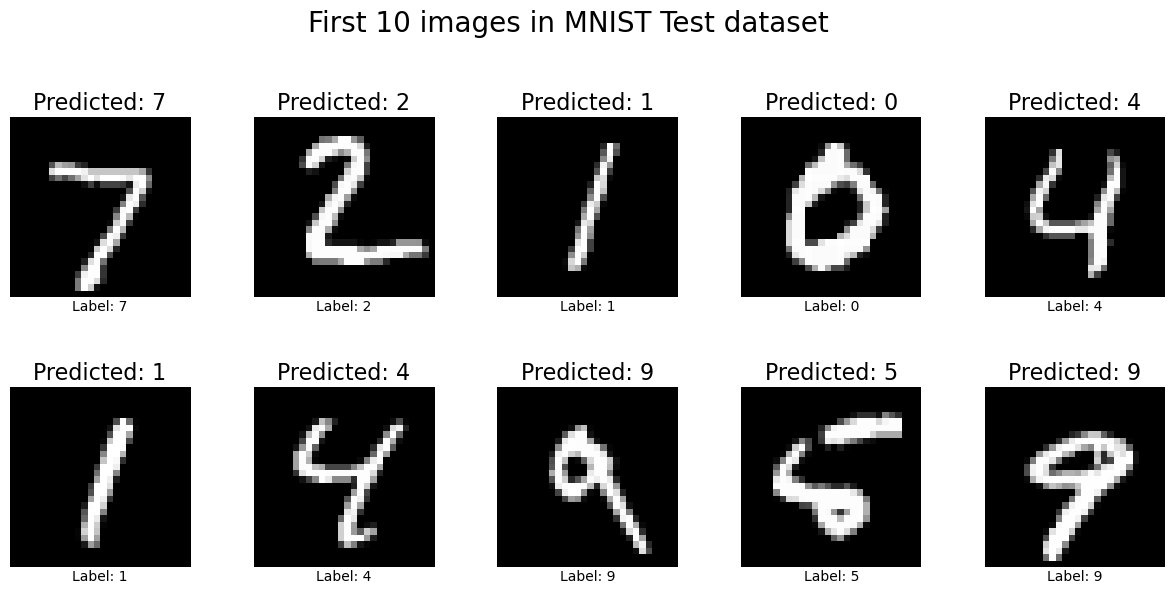

In [34]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('First 10 images in MNIST Test dataset', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3, top=0.8, bottom=0.05)

for i in range(10):
    axs[i//5, i%5].imshow(x_test[i], cmap='gray')
    axs[i//5, i%5].set_title(f"Predicted: {classes[i]}", fontsize=16)
    axs[i//5, i%5].axis('off')
    axs[i//5, i%5].text(0.5, -0.07, f"Label: {y_test[i]}", size=10, ha="center", transform=axs[i//5, i%5].transAxes)
    
plt.show()